In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/titanic_dataset.csv")

In [228]:
df = data.copy()

In [229]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [230]:
df.shape

(891, 12)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [232]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

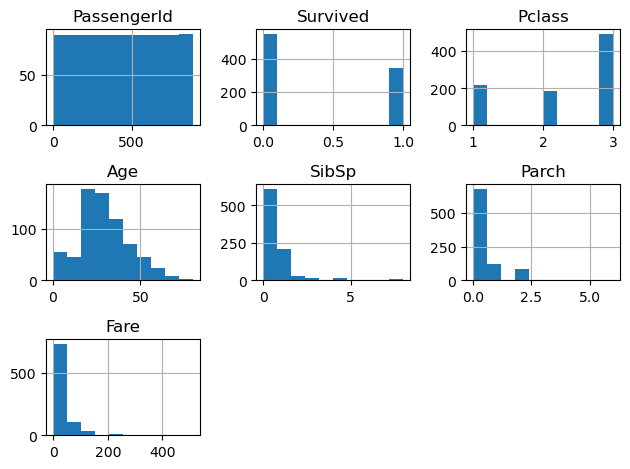

In [233]:
col1 = df.select_dtypes(["int","float"])
col1.hist()
plt.title(col1.columns)
plt.tight_layout()
plt.show()

In [234]:
col2 = ["Cabin","Embarked"]
df["Age"] = df["Age"].fillna(df["Age"].median())

for i in col2:
    df[i] = df[i].fillna(df[i].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

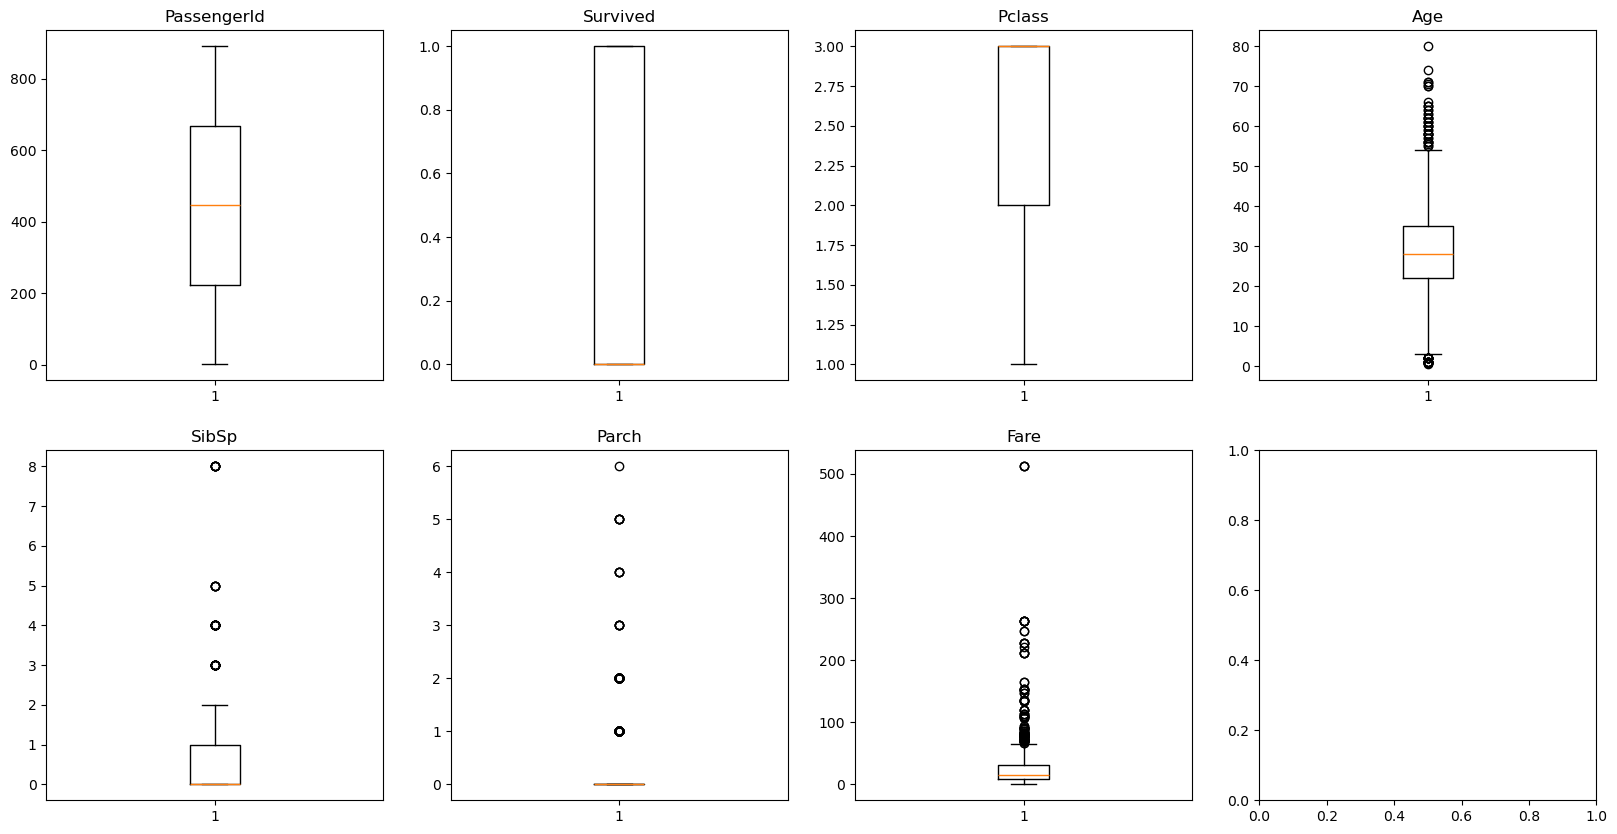

In [235]:
fig,axs = plt.subplots(2,4,figsize = (20,10))
axs = axs.flatten()

for i in range(7):
    axs[i].boxplot(df[col1.columns[i]])
    axs[i].set_title(col1.columns[i])
plt.show()

In [236]:
col1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [237]:
Q1 = np.percentile(df["Age"],25,method = "midpoint")
Q3 = np.percentile(df["Age"],75,method = "midpoint")

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print(f"Q1={Q1}, Q3={Q3}, upper={upper}, lower={lower}")

Q1=22.0, Q3=35.0, upper=54.5, lower=2.5


In [238]:
df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [239]:
outlier = df[(df["Age"] > upper) | (df["Age"] < lower)]
outlier_list = outlier["Age"].tolist()


In [240]:
df = df[(df["Age"] >= lower) & (df["Age"] <= upper)]

outlier = []
for i in df["Age"]:
    if((i > upper) or (i<lower)):
        outlier.append(i)
outlier

[]

In [241]:
Q1 = np.percentile(df["SibSp"],25,method = "midpoint")
Q3 = np.percentile(df["SibSp"],75,method = "midpoint")

IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print(f"Q1={Q1}, Q3={Q3}, upper={upper}, lower={lower}")

Q1=0.0, Q3=1.0, upper=2.5, lower=-1.5


In [242]:
df["SibSp"].describe()

count    825.000000
mean       0.507879
std        1.090670
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [243]:
outlier = df[(df["SibSp"] > upper) | (df["SibSp"] < lower)]["SibSp"].tolist()
df = df[(df["SibSp"] >= lower) & (df["SibSp"] <= upper)]

In [244]:
outlier = []
for i in df["SibSp"]:
    if((i > upper) or (i < lower)):
        outlier.append(i)
outlier

[]

In [245]:
Q1 = np.percentile(df["Parch"],25,method = "midpoint")
Q3 = np.percentile(df["Parch"],75,method = "midpoint")
IQR = Q3 - Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
print(f"Q1={Q1}, Q3={Q3}, upper={upper}, lower={lower}")

Q1=0.0, Q3=0.0, upper=0.0, lower=0.0


In [246]:
df["Parch"].describe()

count    786.000000
mean       0.296438
std        0.757073
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [247]:
outlier = df[(df["Parch"] > upper) | (df["Parch"] < lower)]
df = df[(df["Parch"] >= lower) & (df["Parch"] <=upper)]

In [248]:
outlier = []

for i in df["Parch"]:
    if((i>upper) or (i<lower)):
        outlier.append(i)
outlier

[]

In [249]:
df.shape

(642, 12)

In [250]:
Q1 = np.percentile(df["Fare"],25,method = "midpoint")
Q3 = np.percentile(df["Fare"],75,method = "midpoint")
IQR = Q3-Q1
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
print(f"Q1={Q1}, Q3={Q3}, upper={upper}, lower={lower}")

Q1=7.8542, Q3=26.0, upper=53.2187, lower=-19.364500000000003


In [251]:
df["Fare"].describe()

count    642.000000
mean      25.391477
std       42.538505
min        0.000000
25%        7.854200
50%       10.008300
75%       26.000000
max      512.329200
Name: Fare, dtype: float64

In [252]:
outlier = df[(df["Fare"] > upper) | (df["Fare"] < lower)]["Fare"].tolist()
df = df[(df["Fare"]>=lower)&(df["Fare"]<=upper)]

In [253]:
outlier = []
for i in df["Fare"]:
    if((i>upper)or(i<lower)):
        outlier.append(i)
outlier

[]

In [254]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q


In [255]:
df.reset_index(drop = True , inplace = True)

In [256]:
df.shape

(561, 12)

## one hot encoding

In [257]:
df1  = df.copy()

In [258]:
obj_col = df1.select_dtypes("object")

obj_col.nunique()

Name        561
Sex           2
Ticket      520
Cabin        56
Embarked      3
dtype: int64

In [259]:
df1.drop(["Name","Ticket"],axis = 1 , inplace = True)

In [260]:
conv = pd.get_dummies(df1,drop_first = True)
conv = conv.astype(int)
conv

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,...,Cabin_E58,Cabin_E63,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F33,Cabin_F38,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1,3,26,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,1,1,35,1,0,53,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0,3,35,0,0,8,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,0,3,28,0,0,8,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,885,0,3,25,0,0,7,1,0,0,...,0,0,0,0,0,0,0,0,0,1
557,887,0,2,27,0,0,13,1,0,0,...,0,0,0,0,0,0,0,0,0,1
558,888,1,1,19,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
559,890,1,1,26,0,0,30,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## labeled encoding

In [261]:
df2 = df.copy()

In [262]:
obj = df2.select_dtypes("object")
obj.nunique()

Name        561
Sex           2
Ticket      520
Cabin        56
Embarked      3
dtype: int64

In [263]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [264]:
df2.drop(["Name","Ticket"] , axis = 1 , inplace = True)

In [265]:
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,B96 B98,S
1,3,1,3,female,26.0,0,0,7.9250,B96 B98,S
2,4,1,1,female,35.0,1,0,53.1000,C123,S
3,5,0,3,male,35.0,0,0,8.0500,B96 B98,S
4,6,0,3,male,28.0,0,0,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...
556,885,0,3,male,25.0,0,0,7.0500,B96 B98,S
557,887,0,2,male,27.0,0,0,13.0000,B96 B98,S
558,888,1,1,female,19.0,0,0,30.0000,B42,S
559,890,1,1,male,26.0,0,0,30.0000,C148,C


In [266]:
obj = df2.select_dtypes(["object"])

for i in obj.columns:
    df2[i] = encoder.fit_transform(df2[i])


In [267]:
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,17,2
1,3,1,3,0,26.0,0,0,7.9250,17,2
2,4,1,1,0,35.0,1,0,53.1000,23,2
3,5,0,3,1,35.0,0,0,8.0500,17,2
4,6,0,3,1,28.0,0,0,8.4583,17,1
...,...,...,...,...,...,...,...,...,...,...
556,885,0,3,1,25.0,0,0,7.0500,17,2
557,887,0,2,1,27.0,0,0,13.0000,17,2
558,888,1,1,0,19.0,0,0,30.0000,12,2
559,890,1,1,1,26.0,0,0,30.0000,27,0
